# Molar Volume and Compressibility Factor from Van Der Waals Equation
This is the first problem of the famous set of [Ten Problems in Chemical Engineering](https://www.polymath-software.com/ASEE/Tenprobs.pdf).  Here, the goal is to solve a single nonlinear algabraic equation.

Jacob Albrecht, 2019

# Problem Setup
Use the van der Waals equation of state, given by: 

$$\left(P+\frac{a}{V^2}\right)\left(V-b\right)=RT$$

where 

$$a=\frac{27}{64}\left(\frac{R^2T^2_c}{P_c}\right)$$

$$b=\frac{RT_c}{8P_c}$$

- $P$ is the pressure in atm
- $V$ is the molar volume in liter/g-mol
- $T$ is temperature in Kelvin
- $R$ is the ideal gas constant (R = 0.08206 atm.liter/g-mol.K)
- $T_c$ is the critical temperature (405.5 K for ammonia)
- $P_c$ is the critical pressure (111.3 atm for ammonia)

Reduced pressure is:

$$P_r=\frac{P}{P_c}$$

And compressibility is:

$$Z=\frac{PV}{RT}$$

# Problem Tasks
a) Calculate the molar volume and compressibility factor for gaseous ammonia at 56 atm and 450 K by using the van der Waals equation of state.

b) Repeat the calculations for the following reduced pressures: $P_r$ = 1, 2, 4, 10, and 20. 

c. How does the compressibility factor vary as a function of $P_r$?

# Solutions

Because we need to rearrange the equation, we can use the `sympy` package to do the algebra for us:

In [1]:
 import sympy

In [2]:
P,V,N,R,T,a,b,Pc,Pr,Tc,Z = sympy.symbols('P V N R T a b Pc Pr Tc Z')

In [3]:
eq1 = sympy.Eq((P+a/V**2)*(V-b),R*T)
a_def = sympy.Eq(27/64*(R**2*Tc**2/Pc),a)
b_def = sympy.Eq(R*Tc/(8*Pc),b)

Lets confirm we've entered in the equations

In [4]:
eq1

Eq((P + a/V**2)*(V - b), R*T)

In [5]:
a_def

Eq(0.421875*R**2*Tc**2/Pc, a)

In [6]:
b_def

Eq(R*Tc/(8*Pc), b)

We can refresh the values for $a$ and $b$ with subsitution:

In [7]:
eq1_subs = eq1.subs({a:27/64*(R**2*Tc**2/Pc),b:R*Tc/(8*Pc)})
eq1_subs

Eq((P + 0.421875*R**2*Tc**2/(Pc*V**2))*(V - R*Tc/(8*Pc)), R*T)

## Solution to part a)
Subsitute the Pressure and Temperature given for part a:

In [8]:
eq1_subs_part_a = eq1_subs.subs({P:56,R:0.08206,T:450,Pc:111.3,Tc:405.5})

Next, we can substitute the other values, and solve for $V$

In [9]:
root = sympy.solveset(eq1_subs_part_a,symbol = V, domain=sympy.S.Reals)
root.args[0]

0.574891913557151

Solve for $Z$

In [10]:
(P*V/(R*T)).subs({P:56,R:0.08206,T:450,V:root.args[0]})

0.871826770633966

## Solution to part b)

Loop through the different reduced pressures, and make a table of the results:

In [11]:
Vs = []
Zs = []
Prs = [1,2,4,10,20]
for Pr in Prs:
    eq1_subs_part_b = eq1_subs.subs({P:Pr*111.3,R:0.08206,T:450,Pc:111.3,Tc:405.5})
    root = sympy.solveset(eq1_subs_part_b,symbol = V, domain=sympy.S.Reals)
    Vs.append(root.args[0])
    Zs.append((P*V/(R*T)).subs({P:Pr*111.3,R:0.08206,T:450,V:root.args[0]}))

In [12]:
import pandas as pd
%matplotlib inline
part_b = pd.DataFrame({'Reduced Pressure':Prs,'Molar Volume':Vs,'Compressibility factor':Zs},dtype='float')
part_b

,Reduced Pressure,Molar Volume,Compressibility factor
0,1.0,0.233509,0.703808
1,2.0,0.077268,0.465777
2,4.0,0.060654,0.731261
3,10.0,0.050875,1.533409
4,20.0,0.046175,2.783482


## Solution to part c)
Plot the Compressibility factor vs. Reduced pressure

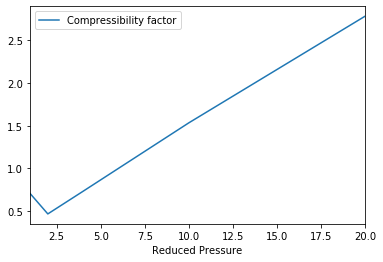

In [13]:
part_b.plot('Reduced Pressure','Compressibility factor');

# Reference
“The Use of Mathematical Software packages in Chemical Engineering”, Michael B. Cutlip, John J. Hwalek, Eric H.
Nuttal, Mordechai Shacham, Workshop Material from Session 12, Chemical Engineering Summer School, Snowbird,
Utah, Aug., 1997.

In [14]:
%load_ext watermark
%watermark -v -p sympy,pandas,matplotlib

CPython 3.7.3
IPython 7.6.1

sympy 1.4
pandas 0.25.1
matplotlib 3.1.0
